In [290]:
## import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from glob import glob

In [291]:
## input data
img_dir = '/content/drive/MyDrive/training_ml_geospasial_geosoftware/sesi6-AlgoSupervisedDataRaster/Forest Segmented/images'
mask_dir = '/content/drive/MyDrive/training_ml_geospasial_geosoftware/sesi6-AlgoSupervisedDataRaster/Forest Segmented/masks'

In [292]:
img_path = glob(img_dir + '/*.jpg')[0]
mask_path = glob(mask_dir + '/*.jpg')[0]

In [293]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

array([[[ 62,  80,  81],
        [ 65,  83,  84],
        [ 61,  81,  82],
        ...,
        [ 43,  62,  69],
        [ 52,  74,  79],
        [ 68,  93,  97]],

       [[ 62,  80,  81],
        [ 65,  83,  84],
        [ 62,  82,  83],
        ...,
        [ 62,  81,  84],
        [ 66,  89,  91],
        [ 69,  95,  95]],

       [[ 65,  85,  86],
        [ 65,  85,  86],
        [ 62,  82,  83],
        ...,
        [ 92, 111, 108],
        [ 87, 110, 106],
        [ 79, 105,  99]],

       ...,

       [[112, 141, 168],
        [110, 139, 166],
        [117, 143, 173],
        ...,
        [ 87, 106, 109],
        [ 78,  97, 100],
        [ 52,  71,  74]],

       [[114, 144, 169],
        [106, 135, 162],
        [105, 131, 161],
        ...,
        [101, 117, 123],
        [ 55,  70,  79],
        [ 34,  49,  58]],

       [[102, 132, 157],
        [109, 139, 164],
        [107, 131, 161],
        ...,
        [ 84, 100, 107],
        [ 52,  66,  78],
        [ 42,  55,  69]]], dtype=uint8)
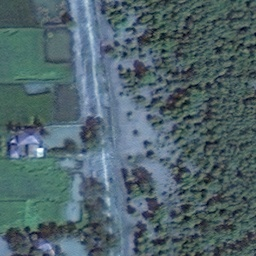

In [294]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
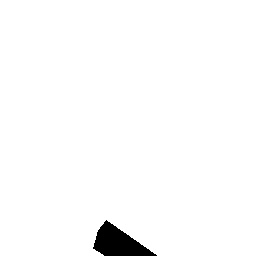

In [295]:
mask

In [296]:
## Melihat Pasangan Gambar
img_path = glob(img_dir + '/*.jpg')[13]


In [297]:
mask_path = img_path.replace('images','masks').replace("_sat_","_mask_")

In [298]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path,0) ## 0 untuk grey scale

array([[[ 82, 105, 121],
        [ 87, 109, 127],
        [ 82,  99, 120],
        ...,
        [113, 125, 153],
        [107, 121, 149],
        [103, 117, 145]],

       [[ 95, 118, 134],
        [ 80, 102, 120],
        [ 83, 102, 123],
        ...,
        [ 95, 112, 139],
        [100, 117, 144],
        [107, 124, 151]],

       [[ 86, 111, 127],
        [ 71,  96, 112],
        [ 80, 102, 120],
        ...,
        [ 91, 112, 140],
        [ 90, 111, 139],
        [ 96, 118, 146]],

       ...,

       [[ 68,  82,  70],
        [ 76,  91,  77],
        [ 78,  94,  77],
        ...,
        [ 76,  98,  74],
        [ 76,  95,  78],
        [ 75,  93,  80]],

       [[ 49,  68,  59],
        [ 63,  80,  69],
        [ 59,  77,  64],
        ...,
        [100, 119,  94],
        [112, 124, 104],
        [ 96, 108,  90]],

       [[ 31,  52,  44],
        [ 35,  56,  47],
        [ 66,  83,  72],
        ...,
        [ 92, 106,  82],
        [ 99, 111,  89],
        [ 96, 105,  85]]], dtype=uint8)
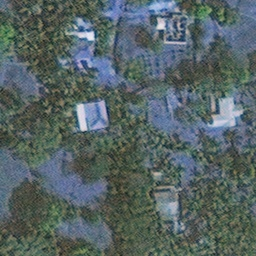

In [299]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)
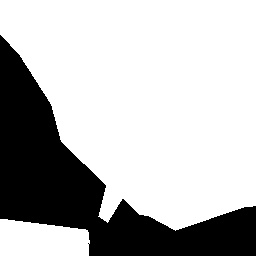

In [300]:
mask

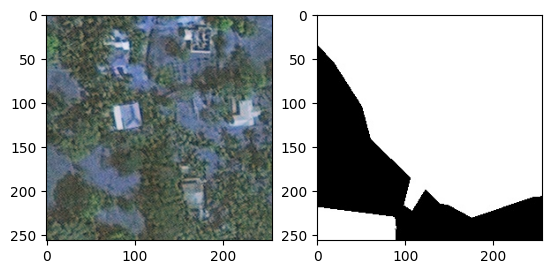

In [301]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(mask,cmap='gray')
plt.show()

In [302]:
## Persiapan Data
X = img.reshape(-1,3) ## jadi 3 kolom

# dari data array jadi 1 kolom
mask_flat = mask.reshape(-1)

y = np.where(mask_flat==255,1,0) ## 255 -> warnanya putih, jika mendekati 0 warna hitam

In [303]:
X.shape

(65536, 3)

In [304]:
y.shape

(65536,)

In [305]:
## Membagi data test dan data train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [306]:
X_train.shape

(45875, 3)

In [307]:
X_test.shape


(19661, 3)

In [308]:
y_train.shape

(45875,)

In [309]:
y_test.shape

(19661,)

In [310]:
## Membangun Model
model = RandomForestClassifier(
    n_estimators=10,
    random_state=100
  )

In [311]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=100)

In [312]:
## Prediksi Data

y_pred = model.predict(X_test)

In [313]:
## Evaluasi Model

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6536798738619602
[[ 1776  3929]
 [ 2880 11076]]
              precision    recall  f1-score   support

           0       0.38      0.31      0.34      5705
           1       0.74      0.79      0.76     13956

    accuracy                           0.65     19661
   macro avg       0.56      0.55      0.55     19661
weighted avg       0.63      0.65      0.64     19661



In [314]:
## Visualisasi Hasil
y_pred_full = model.predict(X)
hasil = y_pred_full.reshape(mask.shape)

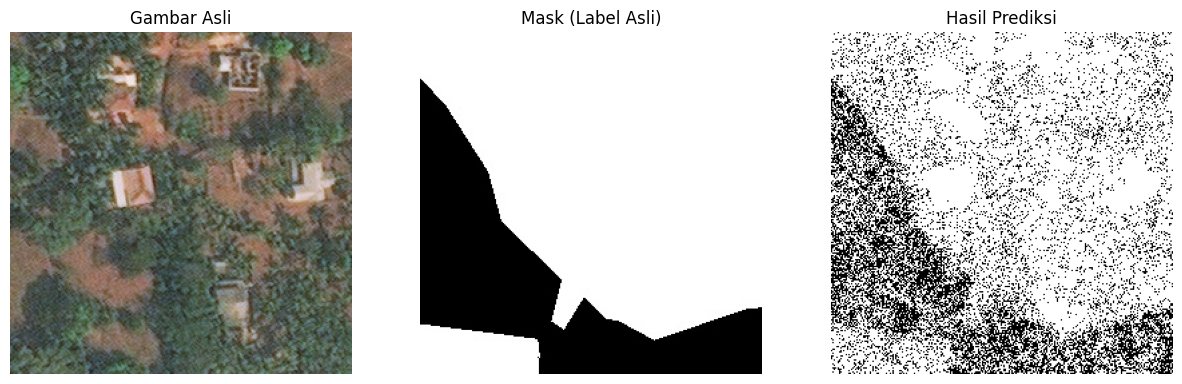

In [315]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask (Label Asli)")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(hasil, cmap='gray')
plt.title("Hasil Prediksi")
plt.axis('off')
plt.show()